In [526]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)


In [527]:
df = pd.read_csv(r'C:\Users\alira\Downloads\projects\customers_sig\customer_segmentation.csv')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [528]:
'''
ID: Unique identifier for each customer (Customer ID)
Year_Birth: The year the customer was born.
Education: The education level of the customer (e.g., graduation, PhD, etc.).
Marital_Status: The marital status of the customer (e.g., single, married, divorced).
Income: The annual income of the customer.
Kidhome: The number of small children in the customer's household.
Teenhome: The number of teenagers in the customer's household.
Dt_Customer: The date the customer was registered in the company’s database.
Recency: The number of days since the customer's last purchase.
MntWines: The amount spent on wines in the last two years.
MntFruits: The amount spent on fruits in the last two years.
MntMeatProducts: The amount spent on meat products in the last two years.
MntFishProducts: The amount spent on fish products in the last two years.
MntSweetProducts: The amount spent on sweet products (e.g., candies, desserts) in the last two years.
MntGoldProds: The amount spent on gold products in the last two years.
NumDealsPurchases: The number of purchases made using discounts or deals.
NumWebPurchases: The number of purchases made through the company’s website.
NumCatalogPurchases: The number of purchases made using a catalog.
NumStorePurchases: The number of purchases made directly at a physical store.
NumWebVisitsMonth: The number of visits to the company’s website in the last month.
AcceptedCmp3: Whether the customer accepted the third campaign (1 for yes, 0 for no).
AcceptedCmp4: Whether the customer accepted the fourth campaign.
AcceptedCmp5: Whether the customer accepted the fifth campaign.
AcceptedCmp1: Whether the customer accepted the first campaign.
AcceptedCmp2: Whether the customer accepted the second campaign.
Complain: Whether the customer has ever complained (1 for yes, 0 for no).
Z_CostContact: Standardized cost per contact (likely a fixed value).
Z_Revenue: Standardized revenue generated by the customer (likely a fixed value).
Response: Whether the customer responded positively to the most recent campaign (1 for yes, 0 for no)
'''

"\nID: Unique identifier for each customer (Customer ID)\nYear_Birth: The year the customer was born.\nEducation: The education level of the customer (e.g., graduation, PhD, etc.).\nMarital_Status: The marital status of the customer (e.g., single, married, divorced).\nIncome: The annual income of the customer.\nKidhome: The number of small children in the customer's household.\nTeenhome: The number of teenagers in the customer's household.\nDt_Customer: The date the customer was registered in the company’s database.\nRecency: The number of days since the customer's last purchase.\nMntWines: The amount spent on wines in the last two years.\nMntFruits: The amount spent on fruits in the last two years.\nMntMeatProducts: The amount spent on meat products in the last two years.\nMntFishProducts: The amount spent on fish products in the last two years.\nMntSweetProducts: The amount spent on sweet products (e.g., candies, desserts) in the last two years.\nMntGoldProds: The amount spent on gol

In [529]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [530]:
df.columns 

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

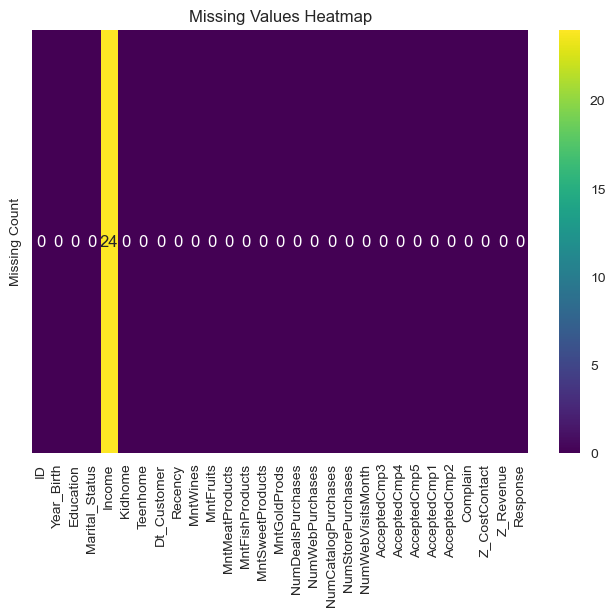

In [532]:
missing_data = df.isnull().sum().to_frame(name='Missing Count')
sns.heatmap(missing_data.T, cmap='viridis', annot=True)
plt.title("Missing Values Heatmap")
plt.show()

In [533]:
df.dropna(inplace=True)
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [534]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [535]:
import datetime
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

In [536]:
df['Marital_Status'] = df['Marital_Status'].astype('category')  
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')  
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')  


In [537]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,NaT,26,426,...,0,0,0,0,0,0,3,11,0,59


In [538]:
num_duplicates = df.duplicated(subset=['ID']).sum()
print(f"Number of duplicate IDs: {num_duplicates}")

Number of duplicate IDs: 0


In [539]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [540]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [541]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'Partner',
    'Together': 'Partner',
    'Single': 'Alone',
    'Divorced': 'Alone',
    'Widow': 'Alone',
    'Alone': 'Alone',
    'Absurd': 'Other',
    'YOLO': 'Other'
})
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Alone,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Alone,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Partner,71613.0,0,0,NaT,26,426,...,0,0,0,0,0,0,3,11,0,59


In [542]:
df['Numbers of sons'] = df['Kidhome'] + df ['Teenhome']
df.drop(['Kidhome','Teenhome'] , axis=1 , inplace=True)
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Numbers of sons
0,5524,1957,Graduation,Alone,58138.0,2012-04-09,58,635,88,546,...,0,0,0,0,0,3,11,1,67,0
1,2174,1954,Graduation,Alone,46344.0,2014-08-03,38,11,1,6,...,0,0,0,0,0,3,11,0,70,2
2,4141,1965,Graduation,Partner,71613.0,NaT,26,426,49,127,...,0,0,0,0,0,3,11,0,59,0


In [543]:
df['Dt_Customer'].unique()

<DatetimeArray>
['2012-04-09 00:00:00', '2014-08-03 00:00:00',                 'NaT',
 '2014-10-02 00:00:00', '2013-09-09 00:00:00', '2013-08-05 00:00:00',
 '2013-06-06 00:00:00', '2012-10-10 00:00:00', '2012-03-11 00:00:00',
 '2012-08-08 00:00:00',
 ...
 '2014-06-02 00:00:00', '2013-07-04 00:00:00', '2014-10-04 00:00:00',
 '2014-12-06 00:00:00', '2013-09-03 00:00:00', '2013-02-06 00:00:00',
 '2013-01-11 00:00:00', '2013-10-08 00:00:00', '2012-11-10 00:00:00',
 '2014-09-01 00:00:00']
Length: 264, dtype: datetime64[ns]

In [544]:
df.shape

(2216, 29)

In [545]:
# Check how many NaT values exist
print(f"Number of NaT values: {df['Dt_Customer'].isna().sum()}")

Number of NaT values: 1311


In [546]:
# Fill NaT with the median date from 'Dt_Customer'
median_date = df['Dt_Customer'].median()
df['Dt_Customer'].fillna(median_date, inplace=True)
median_date


Timestamp('2013-07-02 00:00:00')

In [547]:
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1 , inplace=True)
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Numbers of sons,Total_Spent
0,5524,1957,Graduation,Alone,58138.0,2012-04-09,58,3,8,10,...,0,0,0,0,3,11,1,67,0,1617
1,2174,1954,Graduation,Alone,46344.0,2014-08-03,38,2,1,1,...,0,0,0,0,3,11,0,70,2,27
2,4141,1965,Graduation,Partner,71613.0,2013-07-02,26,1,8,2,...,0,0,0,0,3,11,0,59,0,776


In [548]:
df['Total_Purchases'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df.drop(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], axis=1 , inplace=True)

In [549]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Numbers of sons,Total_Spent,Total_Purchases
0,5524,1957,Graduation,Alone,58138.0,2012-04-09,58,7,0,0,...,0,0,0,3,11,1,67,0,1617,25
1,2174,1954,Graduation,Alone,46344.0,2014-08-03,38,5,0,0,...,0,0,0,3,11,0,70,2,27,6
2,4141,1965,Graduation,Partner,71613.0,2013-07-02,26,4,0,0,...,0,0,0,3,11,0,59,0,776,21


In [550]:
df['Marital_Status'].value_counts()

Marital_Status
Partner    1430
Alone       782
Other         4
Name: count, dtype: int64

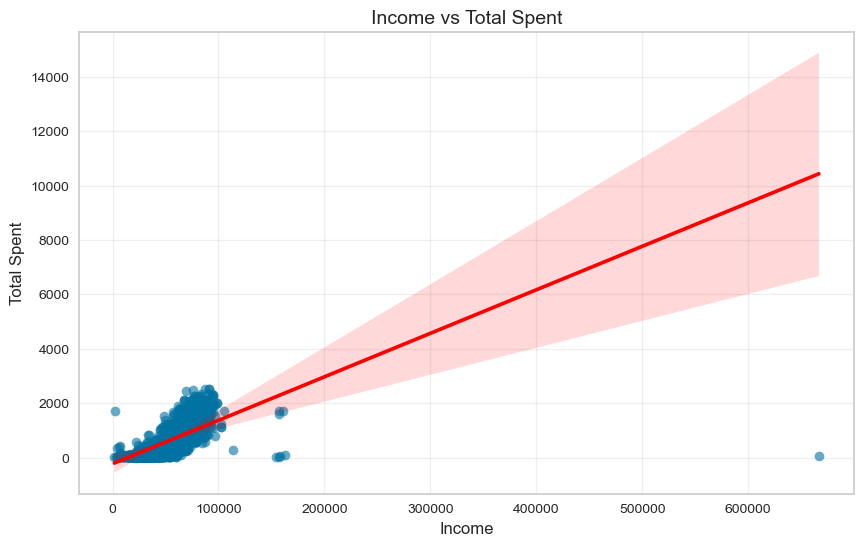

In [551]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Income', y='Total_Spent', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Income vs Total Spent', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Total Spent', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

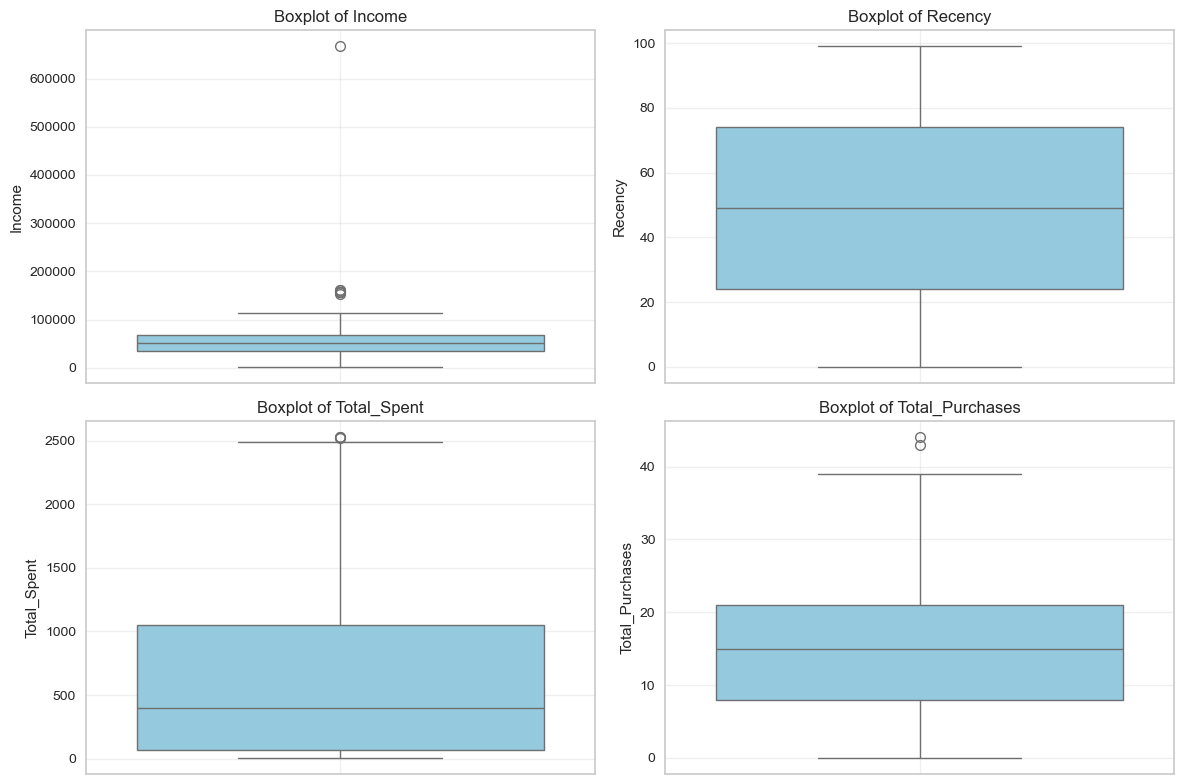

In [552]:
# Select numerical columns only
numerical_cols = ['Income', 'Recency', 'Total_Spent', 'Total_Purchases']

# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


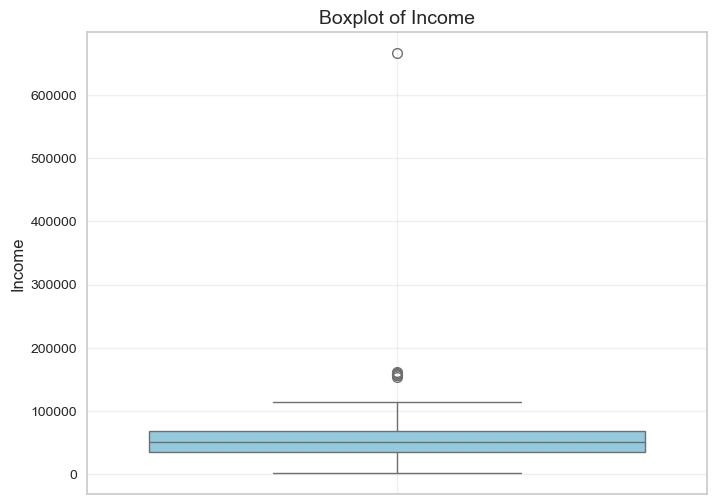

In [553]:
# Boxplot for Income
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Income', color='skyblue')
plt.title('Boxplot of Income', fontsize=14)
plt.ylabel('Income', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [554]:
# Calculate IQR for Income
Q1 = df['Income'].quantile(0.25)  # First quartile
Q3 = df['Income'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                     # Interquartile range

# Define lower and upper bounds for Income
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

# Print results
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Dataset size after removing Income outliers: {df.shape[0]}")


Lower bound: -14525.5
Upper bound: 118350.5
Dataset size after removing Income outliers: 2208


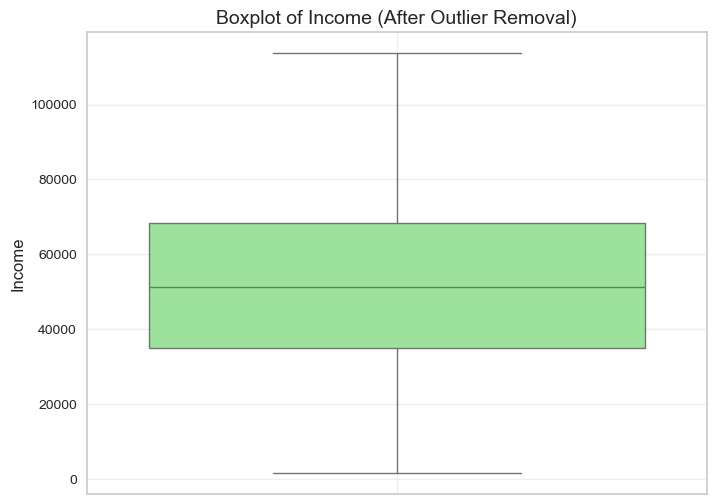

In [555]:
# Boxplot for Income after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Income', color='lightgreen')
plt.title('Boxplot of Income (After Outlier Removal)', fontsize=14)
plt.ylabel('Income', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [556]:
df['Marital_Status'].value_counts()

Marital_Status
Partner    1423
Alone       781
Other         4
Name: count, dtype: int64

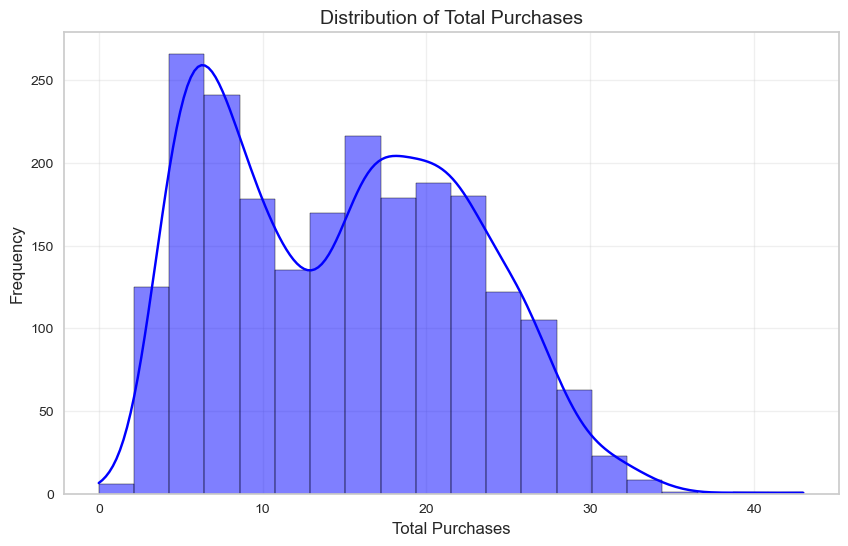

In [557]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Purchases'], kde=True, color='blue', bins=20)
plt.title('Distribution of Total Purchases', fontsize=14)
plt.xlabel('Total Purchases', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


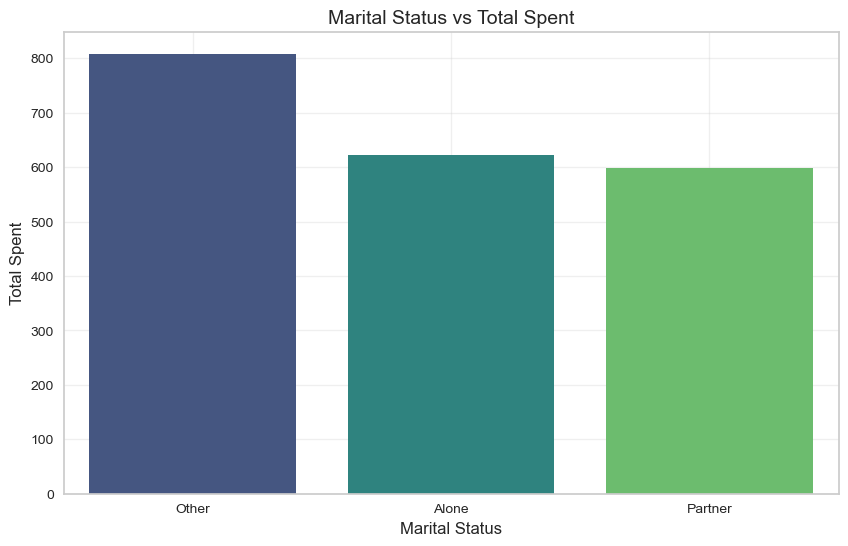

In [558]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Marital_Status', y='Total_Spent', ci=None, palette='viridis')
plt.title('Marital Status vs Total Spent', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Total Spent', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


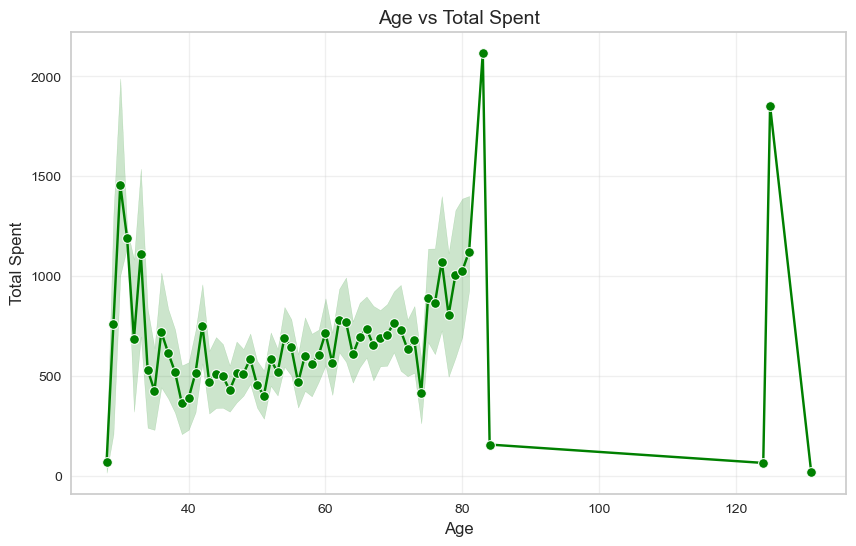

In [559]:
# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Age', y='Total_Spent', marker='o', color='green')
plt.title('Age vs Total Spent', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Spent', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


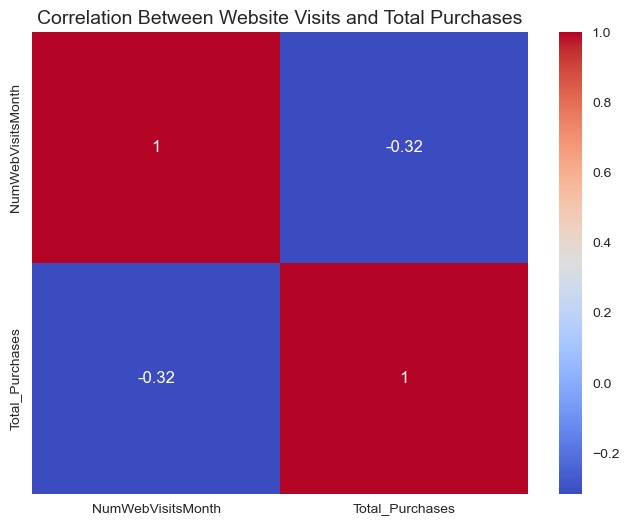

In [560]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['NumWebVisitsMonth', 'Total_Purchases']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Website Visits and Total Purchases', fontsize=14)
plt.show()


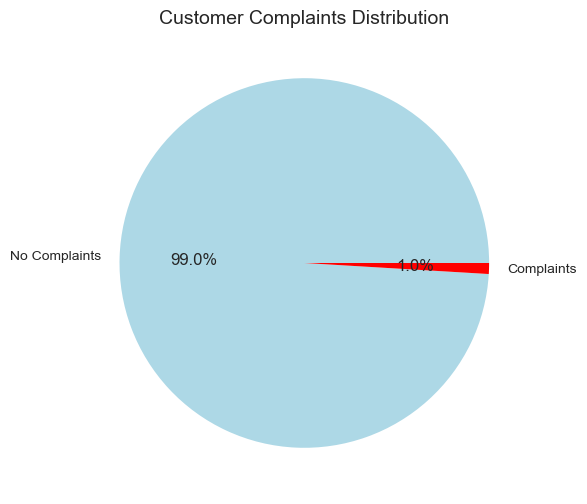

In [561]:
# Pie chart
complain_counts = df['Complain'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(complain_counts, labels=['No Complaints', 'Complaints'], autopct='%1.1f%%', colors=['lightblue', 'red'])
plt.title('Customer Complaints Distribution', fontsize=14)
plt.show()


In [562]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Numbers of sons,Total_Spent,Total_Purchases
0,5524,1957,Graduation,Alone,58138.0,2012-04-09,58,7,0,0,...,0,0,0,3,11,1,67,0,1617,25
1,2174,1954,Graduation,Alone,46344.0,2014-08-03,38,5,0,0,...,0,0,0,3,11,0,70,2,27,6
2,4141,1965,Graduation,Partner,71613.0,2013-07-02,26,4,0,0,...,0,0,0,3,11,0,59,0,776,21


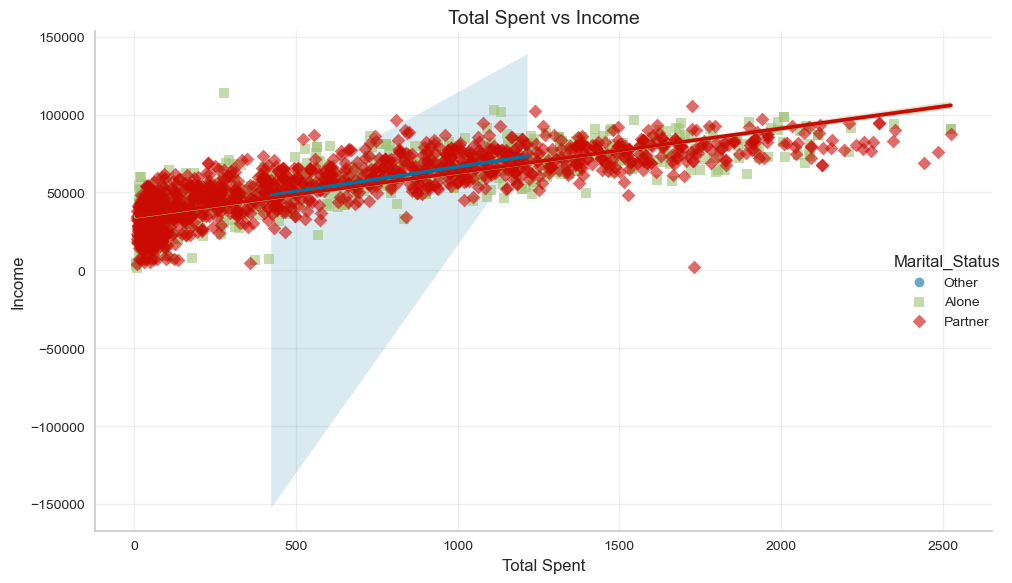

In [563]:
sns.lmplot(
    data=df,
    x='Total_Spent',
    y='Income',
    hue='Marital_Status',
    height=6,  # Figure height
    aspect=1.5,  # Aspect ratio
    markers=["o", "s", "D"],  # Optional: Custom markers for different categories
    scatter_kws={"alpha": 0.6},  # Transparency for scatter points
)

# Adding title and labels
plt.title('Total Spent vs Income', fontsize=14)
plt.xlabel('Total Spent', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.grid(alpha=0.3)  # Adding a grid
plt.tight_layout()
plt.show()


In [564]:
categorical_columns = ['Marital_Status', 'Education']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df = df.astype('int64')
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [565]:
df.head(3)

,ID,Year_Birth,Income,Dt_Customer,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,...,Age,Numbers of sons,Total_Spent,Total_Purchases,Marital_Status_Alone,Marital_Status_Partner,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,5524,1957,58138,2012-04-09,58,7,0,0,0,0,...,67,0,1617,25,1,0,0,1,0,0
1,2174,1954,46344,2014-08-03,38,5,0,0,0,0,...,70,2,27,6,1,0,0,1,0,0
2,4141,1965,71613,2013-07-02,26,4,0,0,0,0,...,59,0,776,21,0,1,0,1,0,0


In [566]:
df.columns

Index(['ID', 'Year_Birth', 'Income', 'Dt_Customer', 'Recency',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Age', 'Numbers of sons', 'Total_Spent',
       'Total_Purchases', 'Marital_Status_Alone', 'Marital_Status_Partner',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD'],
      dtype='object')

In [567]:
# Select features for clustering
features = ['Income', 'Recency', 'NumWebVisitsMonth', 'Age', 'Numbers of sons', 
            'Total_Spent', 'Total_Purchases', 'Marital_Status_Alone', 
            'Marital_Status_Partner', 'Education_Basic', 'Education_Graduation', 
            'Education_Master', 'Education_PhD']

In [568]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

In [569]:
# Initiating PCA to reduce dimensions (features) to 3
pca = PCA(n_components=3)
pca.fit(df_scaled)
PCA_ds = pd.DataFrame(pca.transform(df_scaled), columns=["col1", "col2", "col3"])
print("Summary of PCA-transformed data:")
print(PCA_ds.describe().T)

Summary of PCA-transformed data:
       count          mean       std       min       25%       50%       75%  \
col1  2208.0  2.896234e-17  1.804194 -4.885823 -1.621266 -0.287821  1.572072   
col2  2208.0 -1.512478e-16  1.414073 -1.305826 -1.074490 -0.978365  1.856435   
col3  2208.0 -3.298489e-17  1.277913 -2.644227 -1.344614  0.600297  1.175595   

           max  
col1  4.105953  
col2  2.196289  
col3  1.868742  


In [570]:
# A 3D Projection of Data in the Reduced Dimension
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

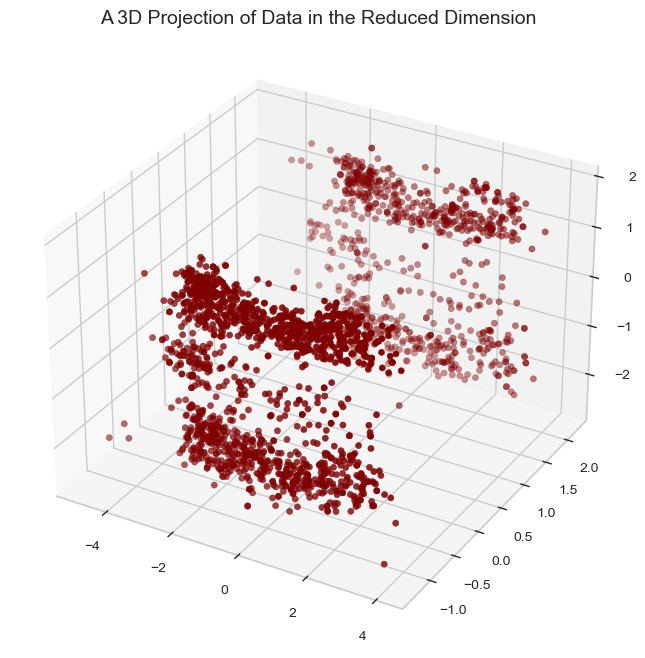

In [571]:
# Plotting the 3D Projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="maroon", marker="o")
ax.set_title("A 3D Projection of Data in the Reduced Dimension", fontsize=14)
plt.show()

Elbow Method to determine the number of clusters:


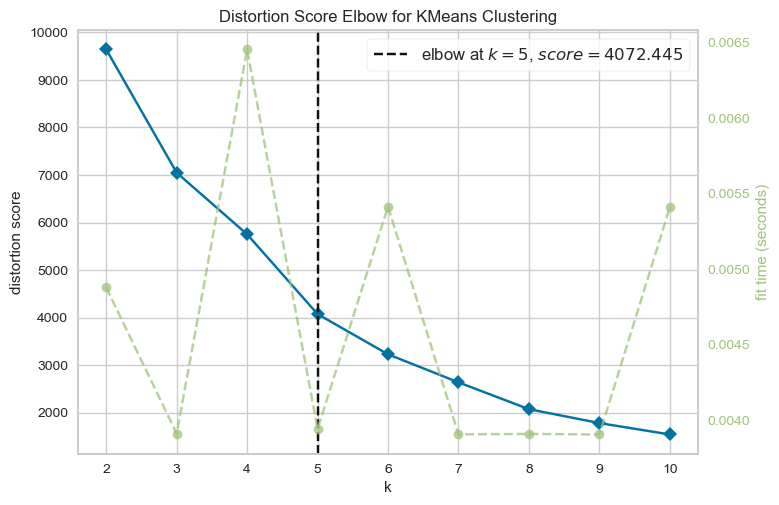

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [572]:
# Elbow Method to determine the optimal number of clusters
print("Elbow Method to determine the number of clusters:")
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [573]:
# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=5)

In [574]:
# Fit the model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

In [575]:
# Adding the Clusters feature to the original dataframe
df["Clusters"] = yhat_AC

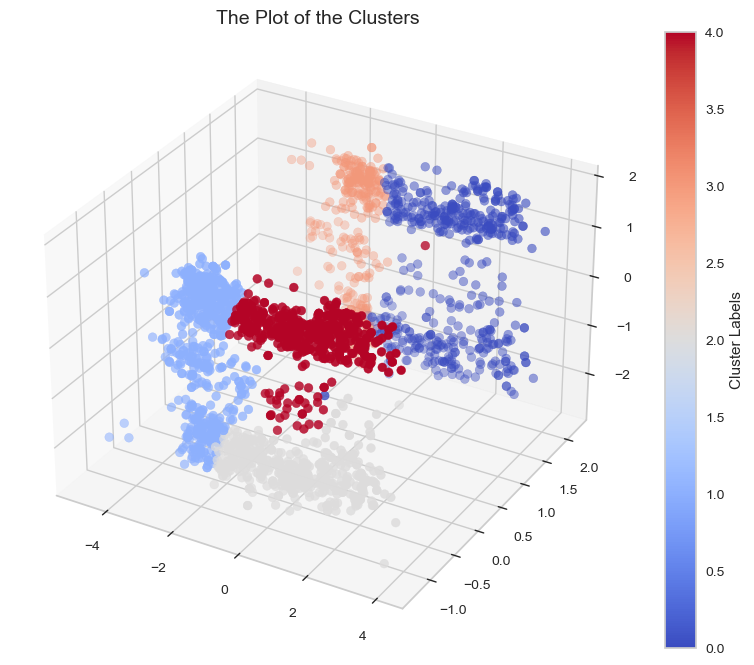

In [576]:
# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(
    x, y, z, s=40, c=PCA_ds["Clusters"], marker="o", cmap="coolwarm"
)
ax.set_title("The Plot of the Clusters", fontsize=14)
plt.colorbar(scatter, ax=ax, label="Cluster Labels")  # Optional colorbar
plt.show()

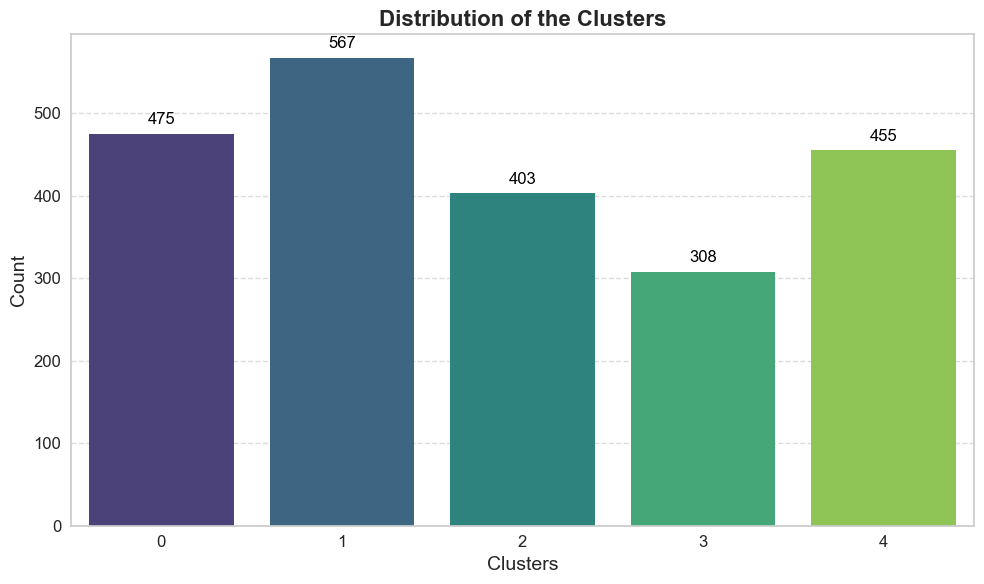

In [577]:
# Count plot of the clusters with enhancements
plt.figure(figsize=(10, 6))
palette = sns.color_palette("viridis", len(df["Clusters"].unique()))  # Custom color palette

# Create the count plot
pl = sns.countplot(x=df["Clusters"], palette=palette)

# Annotate the bars with counts
for p in pl.patches:
    pl.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        fontsize=12, color='black', 
        xytext=(0, 10), 
        textcoords='offset points'
    )

# Add title and labels
pl.set_title("Distribution of the Clusters", fontsize=16, weight="bold")
pl.set_xlabel("Clusters", fontsize=14)
pl.set_ylabel("Count", fontsize=14)

# Add gridlines for better readability
pl.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [578]:
# Display the first few rows of the DataFrame with clusters
print("Preview of the data with cluster assignments:")
print(df[["Clusters"]].head())

# Count the number of records in each cluster
print("\nNumber of records in each cluster:")
print(df["Clusters"].value_counts())


Preview of the data with cluster assignments:
   Clusters
0         0
1         3
2         4
3         1
4         2

Number of records in each cluster:
Clusters
1    567
0    475
4    455
2    403
3    308
Name: count, dtype: int64


In [579]:
# Group data by clusters and display records in each cluster
for cluster in sorted(df["Clusters"].unique()):
    print(f"\nRecords in Cluster {cluster}:")
    print(df[df["Clusters"] == cluster])



Records in Cluster 0:
        ID  Year_Birth  Income Dt_Customer  Recency  NumWebVisitsMonth  \
0     5524        1957   58138  2012-04-09       58                  7   
6      965        1971   55635  2013-07-02       34                  6   
12    2125        1959   63033  2013-07-02       82                  2   
13    8180        1952   59354  2013-07-02       53                  6   
15    2114        1946   82800  2013-07-02       23                  3   
...    ...         ...     ...         ...      ...                ...   
2221  7366        1982   75777  2013-04-07       12                  1   
2224  4286        1970   57642  2014-09-01       24                  4   
2227  4201        1962   57967  2013-03-03       39                  5   
2231  9817        1970   44802  2013-07-02       71                  8   
2237  7270        1981   56981  2013-07-02       91                  6   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  ...  \
0                0 

In [ ]:
df.to_csv("clustered_data.csv", index=False)
print("Cluster assignments saved to 'clustered_data.csv'")


Cluster assignments saved to 'clustered_data.csv'


In [581]:
df = pd.read_csv(r'C:\Users\alira\Downloads\projects\customers_sig\clustered_data.csv')
df.head(5)

,ID,Year_Birth,Income,Dt_Customer,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,...,Numbers of sons,Total_Spent,Total_Purchases,Marital_Status_Alone,Marital_Status_Partner,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Clusters
0,5524,1957,58138,2012-04-09,58,7,0,0,0,0,...,0,1617,25,1,0,0,1,0,0,0
1,2174,1954,46344,2014-08-03,38,5,0,0,0,0,...,2,27,6,1,0,0,1,0,0,3
2,4141,1965,71613,2013-07-02,26,4,0,0,0,0,...,0,776,21,0,1,0,1,0,0,4
3,6182,1984,26646,2014-10-02,26,6,0,0,0,0,...,1,53,8,0,1,0,1,0,0,1
4,5324,1981,58293,2013-07-02,94,5,0,0,0,0,...,1,422,19,0,1,0,0,0,1,2
